<a href="https://colab.research.google.com/github/cantaruttim/COHORT/blob/main/An%C3%A1lise_de_COHORT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

principalmente para quem trabalha com retenção de clientes. A ideia é mapear a entrada e saída da sua base, para entender a retenção ao longo do tempo.

In [1]:
import pandas as pd

df = pd.read_excel('/content/Online Retail.xlsx')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [2]:
## se CustomerID estiver vazio, não poderemos acompnhar o comportamento do cliente ao longo do tempo
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [3]:
## vamos retirar esses valores vazios
df.dropna(subset=['CustomerID'], inplace = True)

In [4]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [5]:
df.shape

(406829, 8)

In [6]:
df.describe(percentiles = [0.25, 0.35, 0.50, 0.65, 0.75])

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
35%,3.000000,1.250000,14456.000000
50%,5.000000,1.950000,15152.000000
65%,10.000000,2.890000,16133.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
import numpy as np

np.median(df['Quantity'])

5.0

In [9]:
invoice_per_customer = df.groupby(['CustomerID'])['InvoiceNo'].nunique().sort_values()
invoice_per_customer.describe()

count    4372.000000
mean        5.075480
std         9.338754
min         1.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       248.000000
Name: InvoiceNo, dtype: float64

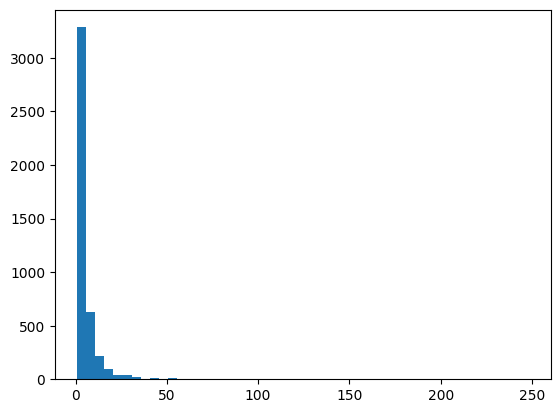

In [10]:
import matplotlib.pyplot as plt

_ = plt.hist(invoice_per_customer, bins = 50)

Lembra que a cohort é uma análise feita para verificar a retenção de clientes. No nosso caso, vamos identificar os clientes que seguem

realizando compras mensalmente.

In [11]:
retail = df[['CustomerID', 'InvoiceNo', 'InvoiceDate']].drop_duplicates()
retail

,CustomerID,InvoiceNo,InvoiceDate
0,17850.0,536365,2010-12-01 08:26:00
7,17850.0,536366,2010-12-01 08:28:00
9,13047.0,536367,2010-12-01 08:34:00
21,13047.0,536368,2010-12-01 08:34:00
25,13047.0,536369,2010-12-01 08:35:00
...,...,...,...
541865,13777.0,581583,2011-12-09 12:23:00
541867,13777.0,581584,2011-12-09 12:25:00
541869,15804.0,581585,2011-12-09 12:31:00
541890,13113.0,581586,2011-12-09 12:49:00


In [12]:
## fazer a cohort por mês

retail['InvoiceMonth'] = retail['InvoiceDate'].dt.to_period('M')
retail

,CustomerID,InvoiceNo,InvoiceDate,InvoiceMonth
0,17850.0,536365,2010-12-01 08:26:00,2010-12
7,17850.0,536366,2010-12-01 08:28:00,2010-12
9,13047.0,536367,2010-12-01 08:34:00,2010-12
21,13047.0,536368,2010-12-01 08:34:00,2010-12
25,13047.0,536369,2010-12-01 08:35:00,2010-12
...,...,...,...,...
541865,13777.0,581583,2011-12-09 12:23:00,2011-12
541867,13777.0,581584,2011-12-09 12:25:00,2011-12
541869,15804.0,581585,2011-12-09 12:31:00,2011-12
541890,13113.0,581586,2011-12-09 12:49:00,2011-12


In [13]:
retail['Cohort'] = retail.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')
retail

,CustomerID,InvoiceNo,InvoiceDate,InvoiceMonth,Cohort
0,17850.0,536365,2010-12-01 08:26:00,2010-12,2010-12
7,17850.0,536366,2010-12-01 08:28:00,2010-12,2010-12
9,13047.0,536367,2010-12-01 08:34:00,2010-12,2010-12
21,13047.0,536368,2010-12-01 08:34:00,2010-12,2010-12
25,13047.0,536369,2010-12-01 08:35:00,2010-12,2010-12
...,...,...,...,...,...
541865,13777.0,581583,2011-12-09 12:23:00,2011-12,2010-12
541867,13777.0,581584,2011-12-09 12:25:00,2011-12,2010-12
541869,15804.0,581585,2011-12-09 12:31:00,2011-12,2011-05
541890,13113.0,581586,2011-12-09 12:49:00,2011-12,2010-12


Utilizamos o transform() para criar a menor data de compra para cada cliente sem perder a estrutura original dos dados. Se não tivéssemos incluído o transform(), os dados ficariam agrupados como na visão do groupby. Depois de pegar a menor data, precisamos pegar o ano e mês dela, pois essa é a cohort. Caso contrário, não conseguiríamos colocar numa mesma cohort todos os clientes, cada um ficaria num dia diferente

O que a gente precisa fazer, no fim das contas, é contar quantos consumidores aparecem no início de cada cohort e quantos deles estão nos meses seguintes.

In [14]:
retail_cohort = retail.groupby(['Cohort', 'InvoiceMonth']).agg(n_customers=('CustomerID', 'nunique')) \
                              .reset_index(drop=False)
retail_cohort

,Cohort,InvoiceMonth,n_customers
0,2010-12,2010-12,948
1,2010-12,2011-01,362
2,2010-12,2011-02,317
3,2010-12,2011-03,367
4,2010-12,2011-04,341
...,...,...,...
86,2011-10,2011-11,93
87,2011-10,2011-12,46
88,2011-11,2011-11,321
89,2011-11,2011-12,43


Para facilitar a construção da matriz, vamos criar uma coluna com a numeração de cada período após o início da cohort.

In [15]:
retail_cohort['Period'] = (retail_cohort.InvoiceMonth - retail_cohort.Cohort).apply(lambda x: x.n)
retail_cohort.head()

,Cohort,InvoiceMonth,n_customers,Period
0,2010-12,2010-12,948,0
1,2010-12,2011-01,362,1
2,2010-12,2011-02,317,2
3,2010-12,2011-03,367,3
4,2010-12,2011-04,341,4


In [16]:
cohort_pivot = retail_cohort.pivot_table(index = 'Cohort', columns = 'Period', values = 'n_customers')
cohort_pivot

Period,0,1,2,3,4,5,6,7,8,9,10,11,12
Cohort,,,,,,,,,,,,,
2010-12,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
cohort_size = cohort_pivot.iloc[:, 0]
cohort_size

Cohort
2010-12    948.0
2011-01    421.0
2011-02    380.0
2011-03    440.0
2011-04    299.0
2011-05    279.0
2011-06    235.0
2011-07    191.0
2011-08    167.0
2011-09    298.0
2011-10    352.0
2011-11    321.0
2011-12     41.0
Freq: M, Name: 0, dtype: float64

In [18]:
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)
retention_matrix

Period,0,1,2,3,4,5,6,7,8,9,10,11,12
Cohort,,,,,,,,,,,,,
2010-12,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
2011-01,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
2011-02,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
2011-03,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
2011-04,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
2011-05,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


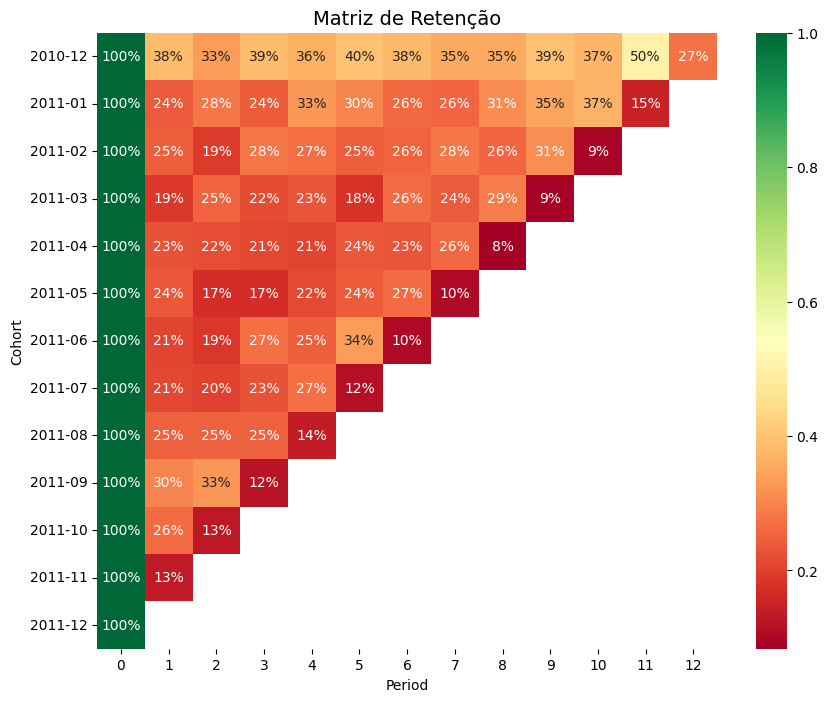

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

_ = plt.subplots(figsize=(10,8))

_ = sns.heatmap(
    data = retention_matrix,
    mask = retention_matrix.isnull(),
    annot = True,
    fmt = '.0%',
    cmap = 'RdYlGn'
)

_ = plt.title('Matriz de Retenção', size = 14)